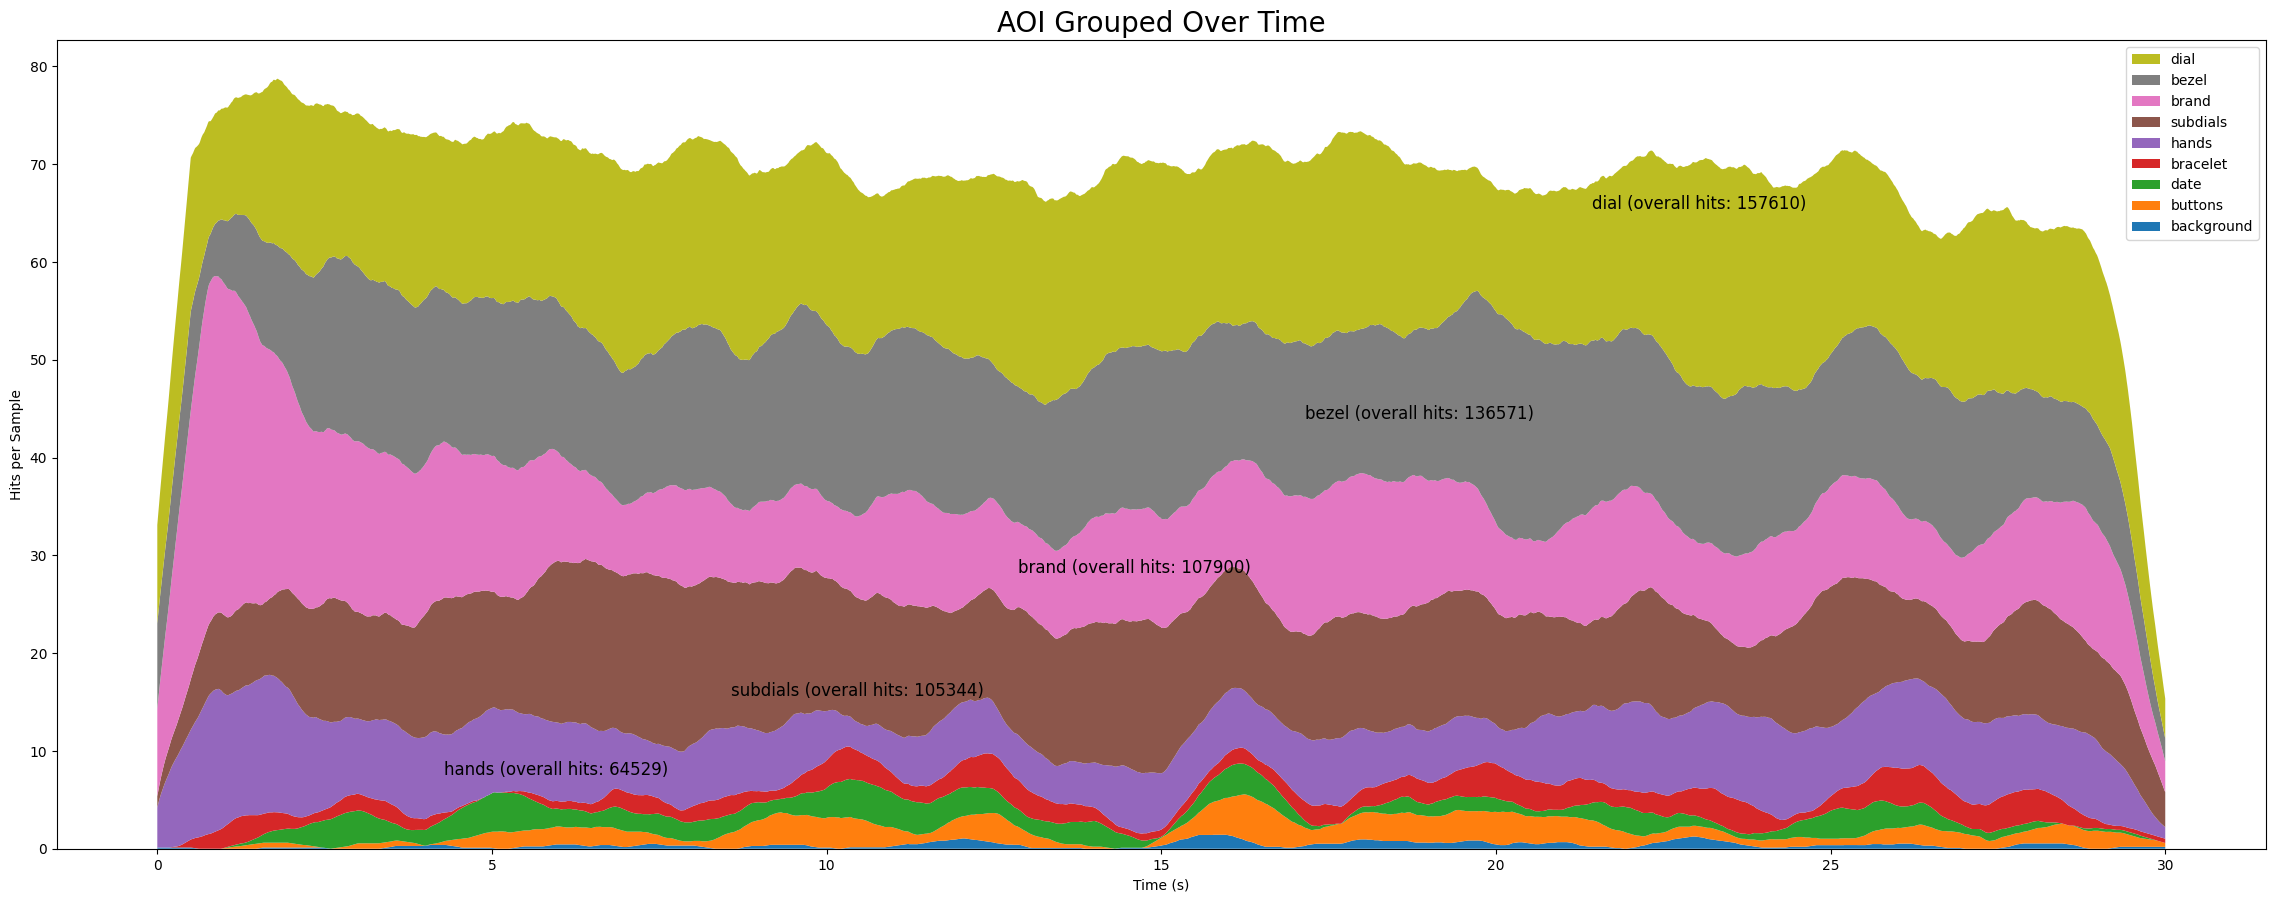

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('AOI_grouped_over_time.csv', header=0)
total_time = len(df) / 300
time = np.arange(0, total_time, 1/300)
df.set_index(time, inplace=True)

# Sort columns by total time spent
column_sums = df.sum()
sorted_sums = column_sums.sort_values()
sorted_columns = sorted_sums.index
df = df[sorted_columns]

# Create a stackplot
fig, ax = plt.subplots()
lines = ax.stackplot(df.index, [np.convolve(df[col], np.ones(
    300)/300, 'same') for col in df.columns], labels=df.columns)

# Select the five largest columns
largest_columns = df.columns[-5:]

# Calculate the y position of each label
y_pos = np.cumsum([np.convolve(df[df.columns[:df.columns.get_loc(
    col)+1]].sum(axis=1), np.ones(300)/300, 'same')[-1] for col in largest_columns])

# Calculate the x position of each label
x_start = df.index[len(df.index)//7]
x_end = df.index[len(df.index)*5//7]
x_pos = np.linspace(x_start, x_end, len(largest_columns))

# Add labels
for i, col in enumerate(largest_columns):
    label = f'{col} (overall hits: {column_sums[col]:.0f})'
    ax.text(x_pos[i], y_pos[i]*1.4+5, label, verticalalignment='center', fontsize=12)

# Set size and labels
fig.set_size_inches(28.5, 10.5)
ax.set_title('AOI Grouped Over Time', fontsize=20)
ax.set_xlabel('Time (s)')
ax.set_ylabel('Hits per Sample')
# Get the handles and labels
handles, labels = ax.get_legend_handles_labels()
# Reverse the order
handles = handles[::-1]
labels = labels[::-1]
# Recreate the legend with the new order
ax.legend(handles, labels, loc='upper right')